# Recurrent Neural Network

Feedforward neural nets are generally great for classification and regression problems. CNNs are great for complex image classification. But, activations for feedforward and CNNs flow only in one direction, from the input layers to the output layer. Since signals flow in only one direction, feedforward and convolutional nets are not ideal if patterns in data change over time. So, we need a different network architecture to work with data impacted by time.

A **recurrent neural network** (RNN) looks a lot like a feedforward neural network, but it also has connections pointing backward. That is, output from one layer can act as input back into another layer earlier in the network. The capability of one layer to inform another layer earlier in the network means that a RNN has a built-in feedback loop mechanism that allows it to act as a forecasting engine. So, RNNs are great as forecasters because they naturally work well as data changes with time.

A RNN remembers the past and its decisions are influenced by what it has learned from the past. Feedforward and convolutional networks only remember what they learn during training. For example, a feedforward image classifier learns what an image looks like during training and then uses that knowledge to classify other images in production. While RNNs learn similarly during training, they also remember what they learned so they can make good decisions as data changes.

# Natural Language Processing

A fascinating advancement in maching learning is the ability to teach a machine how to understand human communication. The area of machine learning that concentrates on understanding how humans communicate is natural language processing. Formally, **natural language processing** (NLP) is a field in machine learning concentrating on the ability of a computer to understand, analyze, manipulate, and potentially generate human language. RNNs are a very important variant of neural networks used heavily for NLP.

RNNs are great for NLP because their standard input is a word instead of the entire sample taken as standard input by sequential nets like feedforward and convolutional networks. So, RNNs have the flexibility to work with varying lengths of sentences, which cannot be achieved by sequential neural networks because of thier fixed structure. RNNs can also share features learned across different positions of text because of their flexible structure.

The feedback loop ability of a RNN allows it to parse each word of a sentence and run an activation on it. The activation value from the word can then be fed back to the layer that is parsing the sentence. So, the activation value informs the sentence of what was learned from each word! And, the cycle continues for each word until the network understands the sentence. In machine learning speak, a RNN treats each word of a sentence as a separate input occurring at a particular time 't' and uses the activation value for this input 't-1' as feedback to the orignal sentence.

As usual, we need to set up the GPU for each notebook. So, click the **Runtime** tab, click **Change runtime type** from the drop-down menu, choose **GPU** from the Hardware Accelerator drop-down menu, and click **Save**.

In [2]:
import tensorflow as tf

# display tf version and test if GPU is active

tf.__version__, tf.test.gpu_device_name()

('2.2.0', '/device:GPU:0')

# Generating Text with a Character-Level RNN Model

As noted, RNNs are commonly used for natural language tasks. Typically, we can model natural language tasks by character or word. We begin by building a **character-level** model that generates text. Later, we build a word-level model that predicts sentiment.

## Get Some Data

Let's get text from **The Adventures of Huckleberry Finn** by Mark Twain. We use the handy Keras **get_file()** function to get the data into memory.

In [ ]:
from tensorflow import keras

huck_finn = keras.utils.get_file('76-0.txt', 'https://www.gutenberg.org/files/76/76-0.txt')
huck_finn

622592/616320 [==============================] - 3s 5us/step


'/root/.keras/datasets/76-0.txt'

If you want to explore other online books for NLP, a great place to start is **Project Gutenberg** at the following URL:

https://www.gutenberg.org/

# Read Data

In NLP, a text document is often referred to as a corpus. A **corpus** is a collection of written texts, especially the entire works of a particular author or a body of writing on a particular subject.

In [ ]:
# read corpus into memory

with open(huck_finn) as f:
  data = f.read()

In [ ]:
# display some text

print (data[:104])

﻿
The Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete
by Mark Twain (Samuel Clemens)


# Clean the Data

We want our model to learn based on the 'Huckleberry Finn' corpus. So, we must remove any information that is not part of the actual corpus content.

In [ ]:
# get the length of the dataset

len(data)

593960

We need the length of the dataset to know where to begin shaving off unecessary information from the end. At the end of this dataset there is information added that has nothing to do with the corpus.

## Slice Off Unecessary Beginning Text

By looking at the data, we notice that there is unecessary information added before the text of the corpus actually begins. We want to remove it so our model can train solely on the corpus text.

In [ ]:
# slice off beginning text that we don't need

data = data[8179:]

Keep in mind that it took us a lot of trial and error experimentation to find the correct place to slice off the unneeded text. So, you need a lot of patience for this task.

In [ ]:
# show actual beginning of book

print (data[:150])

EXPLANATORY

IN this book a number of dialects are used, to wit:  the Missouri negro
dialect; the extremest form of the backwoods Southwestern dialect


In [ ]:
# get length of new dataset

size = len(data)
size

585781

## Find Unecessary Ending Text

By looking at the end of the dataset, we notice that there is unecessary information added. We want to remove it so our model can train solely on the corpus text.

In [ ]:
# find ending text that we don't need 

end = data[567127:]
end

"\n\n\n\n\n\nEnd of the Project Gutenberg EBook of Adventures of Huckleberry Finn,\nComplete, by Mark Twain (Samuel Clemens)\n\n*** END OF THIS PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***\n\n***** This file should be named 76-0.htm or 76-0.zip ***** This and\nall associated files of various formats will be found in:\nhttp://www.gutenberg.net/7/76/\n\nProduced by David Widger. Previous editions produced by Ron Burkey and\nInternet Wiretap\n\nUpdated editions will replace the previous one--the old editions will be\nrenamed.\n\nCreating the works from public domain print editions means that no one\nowns a United States copyright in these works, so the Foundation (and\nyou!) can copy and distribute it in the United States without permission\nand without paying copyright royalties. Special rules, set forth in\nthe General Terms of Use part of this license, apply to copying and\ndistributing Project Gutenberg-tm electronic works to protect the\nPROJECT GUTENBERG-tm concept and trademark. Pr

## Slice Off Unecessary Ending Text

In [ ]:
# slice off ending text that we don't need

corpus = data[0:567127]

This task took even more trial and error experimentation to find the correct place to slice off the unneeded text. Just keep this in mind when working with text documents.

In [ ]:
# show beginning of dataset

print (corpus[:150])

EXPLANATORY

IN this book a number of dialects are used, to wit:  the Missouri negro
dialect; the extremest form of the backwoods Southwestern dialect


In [ ]:
# show end of dataset

print (corpus[567000:])

 Sally she's going to adopt me
and sivilize me, and I can't stand it.  I been there before.

THE END. YOURS TRULY, _HUCK FINN_.


In [ ]:
final_size = len(corpus)
final_size

567127

Whew! With quite a bit of trail and error meanderings, we are able to get just the text of the book. To keep the narrative in tact, we must keep Mr. Twain's punctuation. So, we won't clean that out of the corpus. However, we do have a nasty character to deal with! 

## Remove the Nasty 'A0' Character

Even if we don't see it, we have to fix non-breaking space characters that tend to end up in Python reStructuredText .txt files. **reStructuredText** is a file format for textual data used primarily in the Python programming language community for technical documentation. The troublesome non-breaking space character is the Unicode character code **A0**. We typically see it as '\xa0'. This character is definitely not part of Mark Twain's book!

Luckily, it is easy to remove it, so let's do it now:

In [ ]:
corpus = corpus.replace(u'\xa0', u' ')

# Save the Data

Let's save the cleansed data in case we want to explore it in some other notebook in the future. We must first mount the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Write the full text of the corpus to Google Drive: 

In [ ]:
with open('/content/drive/My Drive/huck_finn.txt', 'w') as f:
  f.write(corpus)

Let's verify that the corpus was saved properly. First, open the file from Google Drive and assign it to a variable. Next, display some text.

In [ ]:
with open('/content/drive/My Drive/huck_finn.txt', 'r') as f:
  a = f.read()

In [ ]:
br = '\n'

print (a[:104], br)
print (corpus[567000:], br)
print (len(a))

EXPLANATORY

IN this book a number of dialects are used, to wit:  the Missouri negro
dialect; the extrem 

 Sally she's going to adopt me
and sivilize me, and I can't stand it.  I been there before.

THE END. YOURS TRULY, _HUCK FINN_. 

567127


Now, the cleansed book is saved!

# Create Vocabulary

Since our goal is to generate text with a character-level model, we must train the model to predict the next character in a sequence. We can then repeatedly call the model to generate longer sequences of text. The first step is to build a vocabulary of unique characters contained in the corpus.    

In [ ]:
# unique characters in the corpus

vocab = sorted(set(corpus))
print ('{} unique characters'.format(len(vocab)))

74 unique characters


So, we have a vocabulary of 74 unique characters in our corpus.

# Vectorize the Text

Algorithms process numbers, not text. So, we must devise a numerical representation of the corpus. An easy solution is to map strings to integers. Let's start by creating a dictionary to hold integer mappings of unique characters. Next, create a numpy array to hold character mappings of each integer representation. The numpy array allows us to translate encoded integer mappings back into their character representations. Now that we have the tools to vectorize the corpus, we can begin building the input pipeline for TensorFlow consumption.

## Create Integer Mappings 

We use dictionary comprehension to create our integer mappings. **Dictionary comprehension** is a method for creating dictionaries using simple expressions. A dictionary comprehension takes the form **{key: value for (key, value) in iterable}**. In our case, the key is a unique character in the corpus and the value is the integer mapping of the unique character.

In [ ]:
# creating a dictionary with integer representations of characters

int_map = {key : value for value, key in enumerate(vocab)}
int_map['a']

46

So, integer '46' represents the letter 'a'. Let's validate that this is the case as so:

In [ ]:
# create numpy array to hold character mappings of integers

import numpy as np

char_map = np.array(vocab)
char_map[46]

'a'

It looks like our mappings work. Let's try it on a sequence.

In [ ]:
# simple sequence
sequence = 'hello world'

# map to integer representations

maps = np.array([int_map[c] for c in sequence])
print ('integer mappings:', maps, br)

# map integer representations back into characters

s = [char_map[i] for i in maps]

# create string from list of characters

s = ''.join(s)
print ('translation:', s)

integer mappings: [53 50 57 57 60  1 68 60 63 57 49] 

translation: hello world


## Vectorize the Corpus

Now, we are ready to vectorize the corpus.

In [ ]:
# vectorize the corpus

encoded = np.array([int_map[c] for c in corpus])
encoded[:11], char_map[encoded[:11]]

(array([24, 43, 35, 31, 20, 33, 20, 39, 34, 37, 44]),
 array(['E', 'X', 'P', 'L', 'A', 'N', 'A', 'T', 'O', 'R', 'Y'], dtype='<U1'))

# Predict the Next Character

At each time step during training, our goal is to predict the next probable character given a character or a sequence of characters. So, input to the model must be a sequence of characters. To reach our goal, we must feed the model proper training data.

# Create Training Input Sequences

To create training intances, we divide the corpus into input sequences. Each input sequence contains 'seq_length' characters from the corpus. The 'seq_length' is the maximum length sentence we want for a single input sequence in characters. We break the corpus into equal length sequences to promote better performance.

For each input sequence, the sample contains the text and the corresponding target contains the text shifted one character to the right. So, we break the text into chunks of 'seq_length + 1'.

Let's look at a very simple example. Given 'seq_length=10' and input sequence of 'yardsticks', the training sample would be 'yardstick' and the target sequence would be 'ardsticks'.

Now, let's convert the encoded corpus to tensors.

In [ ]:
# intialize maximum length sequence for a single input in characters

seq_length = 100

# create training dataset

dataset = tf.data.Dataset.from_tensor_slices(encoded)
dataset

<TensorSliceDataset shapes: (), types: tf.int64>

Let's display some samples from the TensorFlow dataset. Notice that we convert the integer representations of each character back to character state with the char_map() function.

In [ ]:
for i in dataset.take(6):
  print (char_map[i])

E
X
P
L
A
N


# Batch Sequences

The batch method lets us easily convert individual characters to sequences of the desired size.

In [ ]:
sequences = dataset.batch(seq_length + 1, drop_remainder=True)

for i in sequences.take(1):
  print (char_map[i], br)
  print ('batch size:', len(i))

['E' 'X' 'P' 'L' 'A' 'N' 'A' 'T' 'O' 'R' 'Y' '\n' '\n' 'I' 'N' ' ' 't' 'h'
 'i' 's' ' ' 'b' 'o' 'o' 'k' ' ' 'a' ' ' 'n' 'u' 'm' 'b' 'e' 'r' ' ' 'o'
 'f' ' ' 'd' 'i' 'a' 'l' 'e' 'c' 't' 's' ' ' 'a' 'r' 'e' ' ' 'u' 's' 'e'
 'd' ',' ' ' 't' 'o' ' ' 'w' 'i' 't' ':' ' ' ' ' 't' 'h' 'e' ' ' 'M' 'i'
 's' 's' 'o' 'u' 'r' 'i' ' ' 'n' 'e' 'g' 'r' 'o' '\n' 'd' 'i' 'a' 'l' 'e'
 'c' 't' ';' ' ' 't' 'h' 'e' ' ' 'e' 'x' 't'] 

batch size: 101


# Create Samples and Targets

For each input sequence, use the map method to apply the **create_sample_target** function. This function shifts an input sequence by '1' to form the sample and target texts for each batch.

In [ ]:
def create_sample_target(piece):
  sample = piece[:-1]
  target = piece[1:]
  return sample, target

dataset = sequences.map(create_sample_target)

Display the first split input sequence.

In [ ]:
for sample, target in  dataset.take(1):
  print ('sample:', char_map[sample], br)
  print ('target:', char_map[target])

sample: ['E' 'X' 'P' 'L' 'A' 'N' 'A' 'T' 'O' 'R' 'Y' '\n' '\n' 'I' 'N' ' ' 't' 'h'
 'i' 's' ' ' 'b' 'o' 'o' 'k' ' ' 'a' ' ' 'n' 'u' 'm' 'b' 'e' 'r' ' ' 'o'
 'f' ' ' 'd' 'i' 'a' 'l' 'e' 'c' 't' 's' ' ' 'a' 'r' 'e' ' ' 'u' 's' 'e'
 'd' ',' ' ' 't' 'o' ' ' 'w' 'i' 't' ':' ' ' ' ' 't' 'h' 'e' ' ' 'M' 'i'
 's' 's' 'o' 'u' 'r' 'i' ' ' 'n' 'e' 'g' 'r' 'o' '\n' 'd' 'i' 'a' 'l' 'e'
 'c' 't' ';' ' ' 't' 'h' 'e' ' ' 'e' 'x'] 

target: ['X' 'P' 'L' 'A' 'N' 'A' 'T' 'O' 'R' 'Y' '\n' '\n' 'I' 'N' ' ' 't' 'h' 'i'
 's' ' ' 'b' 'o' 'o' 'k' ' ' 'a' ' ' 'n' 'u' 'm' 'b' 'e' 'r' ' ' 'o' 'f'
 ' ' 'd' 'i' 'a' 'l' 'e' 'c' 't' 's' ' ' 'a' 'r' 'e' ' ' 'u' 's' 'e' 'd'
 ',' ' ' 't' 'o' ' ' 'w' 'i' 't' ':' ' ' ' ' 't' 'h' 'e' ' ' 'M' 'i' 's'
 's' 'o' 'u' 'r' 'i' ' ' 'n' 'e' 'g' 'r' 'o' '\n' 'd' 'i' 'a' 'l' 'e' 'c'
 't' ';' ' ' 't' 'h' 'e' ' ' 'e' 'x' 't']


Notice that the target is one character ahead of the sample. We do this so the algorithm can learn from the target how to predict the next character.

# Timestep Prediction

Each index of these vectors is processed as one time step. So, for the input at time step 0, the model receives the index (input_idx) for 'E' and tries to predict the index for 'X' as the next character. At the next timestep, the model repeats the same process. But, the RNN model considers the context of the previous step in addition to the current input character. Let't look at the first 5 timesteps.

In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(sample[:5], target[:5])):
  print('Step:', i)
  print(' input:', input_idx.numpy(), char_map[input_idx])
  print(' expected output:', target_idx.numpy(), char_map[target_idx])
  if i < 4: print()

Step: 0
 input: 24 E
 expected output: 43 X

Step: 1
 input: 43 X
 expected output: 35 P

Step: 2
 input: 35 P
 expected output: 31 L

Step: 3
 input: 31 L
 expected output: 20 A

Step: 4
 input: 20 A
 expected output: 33 N


As we can see, the sample and target data were created properly.

# Create Training Batches

We already split the text into manageable sequences. But, before feeding the data into the model we need to shuffle it and pack it into batches.

In [ ]:
# batch size

BATCH_SIZE = 64

# buffer size

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

TensorFlow data is designed to work with infinite sequences. So, it doesn't attempt to shuffle the entire sequence in memory. Instead, it maintains a buffer where it shuffles elements. We set 'BUFFER_SIZE=10000' to give TensorFlow a fairly large buffer size, but not too big that we cause memory issues. We can see that our dataset contains training samples and targets with batch sizes of 64 and sequence lengths of 100.

# Build the Model

Begin by initializing some important variables. We set **vocab_size** to the number of unique characters in the corpus. We set **embedding dimension** to 256. **Word embedding** is a learning techniques in NLP where words or phrases from the vocabulary are mapped to vectors of real numbers. In practice, we use word embedding vectors with dimensions between 50 and 500. We use **256**, which is we believe is a nice compromise between processing time and performance. The higher the number of word embeddings, the more performance we can squeeze out of our model. But, higher embedding dimensions are computationally expensive. We set **rnn_units** to 1024, which represents the number of neurons output from a layer.

In [ ]:
# length of the vocabulary in chars
vocab_size = len(vocab)

# the embedding dimension
embedding_dim = 256

# number of RNN units
rnn_units = 1024

## Set Random Seed and Import Libraries

In [ ]:
# plant random seed for reproducibility

tf.random.set_seed(0)
np.random.seed(0)

# clear any previous models

keras.backend.clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,\
Embedding
from tensorflow.keras import losses

## Create Layers

The first layer is an embedding layer with the vocabulary size, embedding dimensions, and the input shape of the batch as inputs. The output from the embedding layer feeds into the second layer, which is a GRU layer with 1024 neurons (identified by the rnn_units variable). To retain what was learned at this layer, we set **return_sequences=True** and **stateful=True**. We also want to tell the GRU layer to draw samples from a uniform distribution so we set **recurrent_initializer='glorot_uniform'**. The output from the GRU layer feeds into the final Dense layer with vocabulary size as input.

In [ ]:
model = Sequential([
  Embedding(vocab_size, embedding_dim,
            batch_input_shape=[BATCH_SIZE, None]),
  GRU(rnn_units, return_sequences=True,
      stateful=True, recurrent_initializer='glorot_uniform'),
  Dense(vocab_size)
])

## Display Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           18944     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 74)            75850     
Total params: 4,033,098
Trainable params: 4,033,098
Non-trainable params: 0
_________________________________________________________________


Good! The shape is as expected. The second dimension is 'None' because the model can accept any sequence length.

## Check Output Shape

Display the shape of the first batch in the dataset.

In [ ]:
for sample, target in dataset.take(1):
  example_batch_predictions = model(sample)
  
example_batch_predictions.shape

TensorShape([64, 100, 74])

So, the first batch has 'batch_size' of 64, 'sequence_length' of 100, and 'vocab_size' of 74 as expected. Notice that the output shape from displaying model.summary() is (64, None, 74). The sequence length is not included because the model can be run on inputs of any length.

# Calculate Loss

We sample from the output distribution to predict character indices. The output distribution is defined by the logits over our character vocabulary. A **logit** is a probability value between 0 and 1, and negative infinity to infinity derived from a logit function. Simply, a logit is a prediction. The logit function is an inverse to the sigmoid function as it limits values between 0 and 1 across the Y-axis rather than the X-axis. Since our model returns logits, we need to set the **from_logits** flag to calculate loss.

In [ ]:
def loss(labels, logits):
  return losses.sparse_categorical_crossentropy(labels, logits,
                                                from_logits=True)

The model expects a 3D tensor consisting of batch size, sequence length, and vocabulary size. So, let's test our loss function that it is working as expected.

In [ ]:
pre_trained_loss = loss(target, example_batch_predictions)

print('pred shape: ', example_batch_predictions.shape)
print('scalar_loss: ', pre_trained_loss.numpy().mean())

pred shape:  (64, 100, 74)
scalar_loss:  4.303187


Great! We can see that the prediction shape has batch size of 64, sequence length of 100, and vocabulary size of 74. We also display the average loss from the pretrained model.

# Compile the Model

In [ ]:
model.compile(loss=loss,
              optimizer='adam')

# Configure Checkpoints

With a RNN, we want to save what the model learned at each timestep. One way to do this is to save the checkpoints that hold this information with a callback method. **Checkpoints** capture the exact value of all TensorFlow parameters used by a model.

In [ ]:
import os

# directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'

# name of the checkpoint files
checkpoint_files = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

# callback method
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_files,
    save_weights_only=True)

# Train the Model

Let's train the model on 10 epochs. You can add epochs to improve performance. We tell the model to use the callback function we created with the callback parameter.

In [ ]:
EPOCHS = 10

history = model.fit(dataset, epochs=EPOCHS,
                    callbacks=[checkpoint_callback])

Epoch 1/10
87/87 [==============================] - 4s 43ms/step - loss: 2.9960
Epoch 2/10
87/87 [==============================] - 4s 43ms/step - loss: 2.1643
Epoch 3/10
87/87 [==============================] - 4s 43ms/step - loss: 1.9277
Epoch 4/10
87/87 [==============================] - 4s 43ms/step - loss: 1.7492
Epoch 5/10
87/87 [==============================] - 4s 43ms/step - loss: 1.6126
Epoch 6/10
87/87 [==============================] - 4s 43ms/step - loss: 1.5114
Epoch 7/10
87/87 [==============================] - 4s 43ms/step - loss: 1.4312
Epoch 8/10
87/87 [==============================] - 4s 43ms/step - loss: 1.3700
Epoch 9/10
87/87 [==============================] - 4s 43ms/step - loss: 1.3193
Epoch 10/10
87/87 [==============================] - 4s 43ms/step - loss: 1.2754


# Rebuild Model for Text Creation

## Restore Weights from Checkpoints

First, restore the weights from the checkpoints we established during training. We need to restore the checkpoints to obtain what the RNN learned at each timestep.

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_10'

## Rebuild with Batch Size of 1

Second, to keep prediction simple we use a batch size of 1. Because of the way the RNN state is passed from timestep to timestep, the model only accepts a fixed batch size once built. So, let's rebuild it with batch size of 1 (instead of 64).

In [ ]:
# plant random seed for reproducibility

tf.random.set_seed(0)
np.random.seed(0)

# clear any previous models

keras.backend.clear_session()

BATCH_SIZE = 1

model = Sequential([
  Embedding(vocab_size, embedding_dim,
            batch_input_shape=[BATCH_SIZE, None]),
  GRU(rnn_units, return_sequences=True,
      stateful=True, recurrent_initializer='glorot_uniform'),
  Dense(vocab_size)
])

## Load Weights and Reshape

Third, load the weights and reshape the model to ensure that tensors have batch size of 1.

In [ ]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [ ]:
# good idea to view model at this point

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 256)            18944     
_________________________________________________________________
gru (GRU)                    (1, None, 1024)           3938304   
_________________________________________________________________
dense (Dense)                (1, None, 74)             75850     
Total params: 4,033,098
Trainable params: 4,033,098
Non-trainable params: 0
_________________________________________________________________


All is well! Notice that the second parameter is 'None'. Again, the reason is that the model can accept any sequence length.

# Create New Text

To create new text, we create a function and initialize a set of variables to feed to the function. To prepare the starting string for TensorFlow consumption, we vectorize and reshape before passing it to the function. Let's begin with the function.

## Create the Function

The function accepts the model, vectorized starting string, temperature, and the original starting string. It begins by intializing a list to hold the new text created and resetting the states of the model. The function continues by iterating **n** times (the number of characters we wish to create).

During iteration, the function models the encoded starting string and places the result in **predictions**. It then removes the extra '1' dimension so it can divide the contents of 'predictions' by the temperature. The next task of the function is to use a categorical distribution to predict the next character returned by the model. The function needs to add the '1' dimension back so that it can pass the predicted character as the next input to model along with the previous hidden state. The process repeats until the loop is extinghuised.

In [ ]:
def create_text(model, input_eval, temperature, start_string):

  # Empty string to store our results
  new_text = []

  # Here batch size == 1
  model.reset_states()

  for i in range(n):
    # model encoded input
    predictions = model(input_eval)

    # remove batch dimension so we can manipulate predictions
    predictions = tf.squeeze(predictions, 0)

    # divide predictions by temperature
    predictions = predictions / temperature

    # use a categorical distribution to predict character returned by model
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    # pass predicted character as next input to model with previous hidden state
    input_eval = tf.expand_dims([predicted_id], 0)

    # append generated characters to text
    new_text.append(char_map[predicted_id])

  return (start_string + ''.join(new_text))

## Initialize Variables

Now that we have the function, let's initialize. We begin by setting n to the number of characters we wish to create. We continue by setting the temperature and the starting string. Low temperatures result in more predictable text, while higher temperatures result in more surprising text. You can experiment to find the best setting.

In [ ]:
n = 500
temp = 0.3
start_string = 'Tom'

We can try different start strings, but we chose 'Tom' because we know that the corpus contains this name.

## Vectorize and Reshape Starting String

We need to vectorize the starting string because the model only recognizes numbers. We need to reshape the vectorized starting string it so the model can We display the shapes to verify that all is well.

In [ ]:
# vectorize starting string

input_vectorized = [int_map[s] for s in start_string]
print ('original shape:', end=' ')
print (str(np.array(input_vectorized).ndim) + 'D', br)

input_vectorized = tf.expand_dims(input_vectorized, 0)
print ('new shape:', input_vectorized.shape)

original shape: 1D 

new shape: (1, 3)


## Create New Text with Function Invocation

We are now ready to create new text. Plant random seeds for reproducibility. Next, call the function.

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)

print (create_text(model, input_vectorized, temp, start_string))

Tom Sawyer could see them to the raft and the duke said it was all right along, and I was going to be a
couple of solid that was the best things and started the raft, and they was sorry they was all right and got to the books and the duke said it was a steamboat
could a ten well and struck a body to steal him all the trees of the raft and the steamboat
clothes and clear out of the raft and down the river, and then he took it all the time I started to the steamboat was all the time, and I said it wa


Wow! Although the sentences are nonsensical, the model created actual sentences.

# Sentiment Analysis

We just demonstrated how to train a character-level RNN that enables us to create original text. We now move to a **word-level** RNN to address a common NLP task, namely, sentiment analysis.

**Sentiment analysis** computationally identifies and categorizes opinions expressed in a text corpus to determine attitude or sentiment. Typically, sentiment analysis is used to determine a positive, negative or neutral opinion towards a particular topic or product. This technique is widely applied to reviews, surveys, and documents.

# IMDb Dataset

A popular dataset used to practice NLP is the IMDb reviews dataset. **IMDb** is a benchmark dataset for binary sentiment classification. The dataset contains 50,000 movie reviews labeled as either positive (1) or negative (0). Reviews are preprocessed with each encoded as a sequence of word indexes in the form of integers. Words within the reviews are indexed by their overall frequency within the dataset. The 50,000 reviews are split into 25,000 for training and 25,000 for testing. So, we can predict the number of positive and negative reviews using either classification or other deep learning algorithms.

IMDb is popular because it is simple to use, relative easy to process, and challenging enough for machine learning aficionados. 

# Load IMDb with Keras 

A quick and easy way to explore IMDb is to load the data as a **Keras** dataset. However, we <strong><font color=red>don't</font></strong> recommend training with this dataset because there is a much better way! However, we show you how to train with this dataset at the end of this section for completeness.

The **keras.datasets.imdb.load_data()** function allows us to load the dataset in a format ready for use in neural network and deep learning models. First, words have already been encoded with integers. Second, encoded words are arranged by their absolute popularity in the dataset. So, sentences in each review are comprised of a sequence of integers. Third, calling imdb.load_data() the first time downloads IMDb to your computer and stores it in your home directory under ~/.keras/datasets/imdb.pkl as a 32 megabyte file. The imdb.load_data() function also provides additional arguments including number of top words to load (where words with a lower integer are marked as zero in the returned data), number of top words to skip (to avoid the “the”‘s), and the maximum length of reviews to support.

In [ ]:
# set a random seed for reproducibility

tf.random.set_seed(0)

from keras.datasets import imdb

train, test = imdb.load_data()

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


We begin by loading data into train and test tuples. So, **train[0]** contains training reviews and **train[1]** contains training labels. And, **test[0]** contains test reviews and **test[1]** contains test labels. Each review is represented as a NumPy array of integers with each integer representing a word. The labels contain lists of integer labels (0 is negative and 1 is positive).

For readability, we can create variables to represent reviews and labels. Of course, this step is optional.

In [ ]:
train_reviews, train_labels = train[0], train[1]
test_reviews, test_labels = test[0], test[1]

Let's see the shape of train and test review samples.

In [ ]:
# train and test reviews shape

train_reviews.shape, test_reviews.shape

((25000,), (25000,))

As expected, we have 25,000 training and 25,000 test reviews. Now, let's see the shape of train and test labels.

In [ ]:
# train and test labels shape

train_labels.shape, test_labels.shape

((25000,), (25000,))

As expected, we have 25,000 training and 25,000 test labels.

# Explore the Train Sample

We begin by displaying label categories and number of unique words.

In [ ]:
print ('categories:', np.unique(train_labels))
print('number of unique words:', len(np.unique(np.hstack(train_reviews))))

categories: [0 1]
number of unique words: 88585


We see that the dataset is labeled by two categories that represent the sentiment of each review. And, the train sample contains 88,585 unique words.

## Find the Longest Traning Review

Let's see how many words are in the longest training review.

In [ ]:
longest = np.amax([len(i) for i in train_reviews])

print ('longest review:', longest)

longest review: 2494


We created a list containing the number of words in each review and then found the maximum number of words in the list.

Now, let's get the index of the longest review.

In [ ]:
mid_result = np.where([len(i) for i in train_reviews] == longest)
longest_index = mid_result[0][0]
longest_index

17934

We use the **np.where** function to find the index. We used double indexing because the function returns a tuple containing a list that holds the index we desire.

## Create a Decoding Function

Let's create a function that decodes the review into readable form.

In [ ]:
def readable(review):
  index = imdb.get_word_index()
  reverse_index = dict([(value, key) for (key, value) in index.items()])
  return ' '.join( [reverse_index.get(i - 3, '?') for i in review])

The function uses the **word_index()** function to obtain the dictionary of words and their uniquely assigned integers. It then creates another dictionary containing key, value groupings as value, key groupings from the first dictionary. Finally, it returns the words based on their IDs (keys). The indices are offset by 3 because 0, 1 and 2 are reserved indices for *padding*, *start of sequence* and *unknown*.

## Create a Label Function

In [ ]:
def opinion(label):
  if label == 1:
    return 'positive review'
  elif label == 0:
    return 'negative review'
  else: return 'neutral review'   

## Invoke the Decoding Function

Let's see what the longest review looks like. We just slice off a piece of it because it is pretty long.

In [ ]:
review = readable(train_reviews[longest_index])
print ('review:', end=' ')

# just display a slice of the full review
print (review[:50] + ' ...', br)

label = train_labels[longest_index]
idea = opinion(label)
print (idea, br)

# verify length of review

print (len(train_reviews[longest_index]))

1646592/1641221 [==============================] - 1s 1us/step
review: ? match 1 tag team table match bubba ray and spike ... 

positive review 

2494


So, the longest review has a label of '1', which means the review is positive.

## Find the Shortest Training Review

Now, let's use similar logic to see how many words are in the shortest review.

In [ ]:
shortest = np.amin([len(i) for i in train_reviews])
print ('shortest review:', shortest)

shortest review: 11


Get the index of the shortest review in the train sample.

In [ ]:
result = np.where([len(i) for i in train_reviews] == shortest)
shortest_index = result[0][0]
shortest_index

6719

Let's see what the review looks like.

In [ ]:
review = readable(train_reviews[shortest_index])
print (review[2:], br)

label = train_labels[shortest_index]
idea = opinion(label)
print (idea, br)

# verify length of review

print (len(train_reviews[shortest_index]))

i wouldn't rent this one even on dollar rental night 

negative review 

11


The shortest review has a label of '0', which means the review is negative.

## Continue Exploring the Training Sample

We continue with the average review length.

In [ ]:
length = [len(i) for i in train_reviews]

print ('average review length:', np.mean(length))

average review length: 238.71364


The average length of a review is around 238 words.

 Next, we display the first label and review (encoded as integers).

In [ ]:
first_label = train_labels[0]

print('label:', first_label, end=' ')

idea = opinion(first_label)
print ('(' + idea + ')', br)

# display slice of first review
print (train_reviews[0][:20])

label: 1 (positive review) 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


The first review is positive. The review itself is encoded as a set of integers where each integer represents a word.

We can display the first review in a readable format by decoding the integer IDs back into words.

In [ ]:
review = readable(train_reviews[0])
print (review[2:105] + ' ...')

this film was just brilliant casting location scenery story direction everyone's really suited the part ...


We printed only the first part of the review. To display the full review, just print 'review'.

# Train Keras Data

As mentioned earlier, it is <strong><font color=red>not</font></strong> ideal to train IMDb with Keras data. But, we show you how for completeness. So, we won't time explaining the code. We only train the model for one epoch to verify that everything works as expected.

We also show you this model because Keras is very popular in industry. You may encounter situations where Keras is the sofware of choice. As such, you may not be able to model with TensorFlow 2.x. In the next section, we carefully explain how to train IMDb the recommended way.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM

# limit vocabulary to 8000 most commonly used words in reviews
vocab_size = 8000

# cut text 80 words that correspond to the vocabulary
maxlen = 80

print('load data...', br)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print ('train and test features:')
print (len(x_train), 'train sequences')
print (len(x_test), 'test sequences', br)

print ('sequence shape before padding:')
print ('x_train shape:', x_train.shape)
print ('x_test shape:', x_test.shape, br)

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

# ensure that all samples are the same size for training
print('padded sequences (samples, maxlen):')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape, br)

# prepare data for TensforFlow consumption

buffer_size = 10000
batch_size = 512

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(buffer_size).batch(batch_size).prefetch(1)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(batch_size).prefetch(1)

print('build model...', br)

# clear any previous models

keras.backend.clear_session()

embed_size = 128
model = Sequential([
  Embedding(vocab_size, embed_size, mask_zero=True,
            input_shape=[None]),
  GRU(128, return_sequences=True),
  GRU(128),
  Dense(1, activation="sigmoid")
])

print('compile model...', br)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('train...', br)

# to suppress unuseful error messages

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

epochs = 1 # limit to one epoch to verify that everything works ...
model.fit(train_ds, batch_size=BATCH_SIZE,
          epochs=epochs, validation_data=(test_ds))

load data... 

train and test features:
25000 train sequences
25000 test sequences 

sequence shape before padding:
x_train shape: (25000,)
x_test shape: (25000,) 

padded sequences (samples, maxlen):
x_train shape: (25000, 80)
x_test shape: (25000, 80) 

build model... 

compile model... 

train... 

49/49 [==============================] - 33s 679ms/step - loss: 0.5682 - accuracy: 0.6898 - val_loss: 0.3960 - val_accuracy: 0.8182


# Load IMDb as a TFDS

The <strong><font color=blue>best</font></strong> way to model IMDb data is to load it as a TFDS (TensorFlow Dataset).

In [ ]:
import tensorflow_datasets as tfds

data, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                       as_supervised=True, shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNXWIRP/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNXWIRP/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNXWIRP/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


We use the **imdb_reviews/subwords8k** TFDS so we don't have to train on the entire IMDb datast. The *subwords8k* subset has a vocabulary size of 8,000, which means that we are training the model on the 8,000 most commonly used words in the reviews. It also means that we don't have to build our own vocabulary dictionary. We can get good performance with this subset and substantially reduce training time. Loading the TFDS also gives us access to the **tfds.features.text.SubwordTextEncoder**, which is the TFDS text encoder.

We set **with_info=True** to enable access to information about the dataset and the encoder. We set **as_supervised=True** so the returned TFDS has a 2-tuple structure (input, label) in accordance to builder.info.supervised_keys. If set to *False* (the default), the returned TFDS will have a dictionary with all features included. We set **shuffle_files=True** because shuffling typically improves performance.

For more information about all features of a TFDS, peruse the following URL:

https://www.tensorflow.org/datasets/api_docs/python/tfds/load

For more infor about 'imdb_reviews', peruse the following URL:

https://www.tensorflow.org/datasets/catalog/imdb_reviews

# Display the Keys

In [ ]:
data.keys()

dict_keys(['test', 'train', 'unsupervised'])

By displaying the keys, we know that the dataset is split test, train, and unsupervised samples.

# Split Data into Train and Test Samples

Since we are building a supervised model, we are only interested in the train and test samples.

In [ ]:
train, test = data['train'], data['test']

# Display the First Sample

Display the first review and its label from the training sample.

In [ ]:
for sample, target in train.take(1):
  print ('encoded review:')
  print (sample, br)
  print ('target:', target.numpy())

encoded review:
tf.Tensor(
[  12   31   93  867    7 1256 6585 7961  421  365    2   26   14    9
  988 1089    7    4 6728    6  276 5760 2587    2   81 6118 8029    2
  139 1892 7961    5 5402  246   25    1 1771  350    5  369   56 5397
  102    4 2547    3 4001   25   14 7822  209   12 3531 6585 7961   99
    1   32   18 4762    3   19  184 3223   18 5855 1045    3 4232 3337
   64 1347    5 1190    3 4459    8  614    7 3129    2   26   22   84
 7020    6   71   18 4924 1160  161   50 2265    3   12 3983    2   12
  264   31 2545  261    6    1   66    2   26  131  393    1 5846    6
   15    5  473   56  614    7 1470    6  116  285 4755 2088 7961  273
  119  213 3414 7961   23  332 1019    3   12 7667  505   14   32   44
  208 7975], shape=(142,), dtype=int64) 

target: 0


Each example in both train and test sets contain contain a review tensor and a label tensor. Reviews are already encoded as integers with datatype 'int64'. Labels are either 0 (negative) or 1 (positive) with datatype 'int64'.

We know that the first sample review contains 163 words indicated by **shape=(163,)**. The label is **0**, which means that the review is negative. Notice, that we can convert tensors to values with the **numpy()** method. We didn't convert the review because we wanted to display its shape.

# Display the overall characteristics of the TFDS.

From the 'info' dataset, we can get all kinds of information.

In [ ]:
# see all of the information!

info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [ ]:
# see the train and test sample splits

train_size = info.splits['train'].num_examples
test_size = info.splits['test'].num_examples

train_size, test_size

(25000, 25000)

By perusing the information from 'info', we are able to return the train and test splits with 'info.splits' using the appropriate keys.

In [ ]:
# see the supervised keys

info.supervised_keys

('text', 'label')

In [ ]:
# see feature information

info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [ ]:
# see the name of the TFDS and a slice of its description

info.name, info.description[0:25]

('imdb_reviews', 'Large Movie Review Datase')

In [ ]:
# we can even get the title from citation string!

info.citation[184:242]

'title     = {Learning Word Vectors for Sentiment Analysis}'

To get any piece from the info dataset, just type 'info.' in a code snippet and a drop-down helper pops up.

# Create the Encoder

An encoder is built-into the TFDS *SubwordTextEncoder*. With the encoder, we can easily decode (integer to text) and encode (text to integer). We access the encoder from dataset **info**. Let's create an encoder based on the IMDb dataset we loaded into memory.

In [ ]:
# create an encoder

encoder = info.features['text'].encoder

# Test the Encoder

In [ ]:
sample_string = 'What a Beautiful Day!'

encoded_string = encoder.encode(sample_string)
print ('Encoded string:', encoded_string)

original_string = encoder.decode(encoded_string)
print ('Original string:', original_string)

Encoded string: [274, 4, 6555, 5392, 7961, 2431, 7962]
Original string: What a Beautiful Day!


# Use the Encoder

Create a function that returns the label rating.

In [ ]:
def rev(d):
  if tf.math.equal(d, 0):
    return 'negative review'
  elif tf.math.equal(d, 1):
    return 'positive review'

## Display the First Review

Display the decoded review and its label rating. We only display a part of the review. But, you can display the full review by printing 'text' instead of printing 'text[0:100]' as we did in the example code.

In [ ]:
for sample, target in train.take(1):
  print ('review:', end=' ')
  text = encoder.decode(sample)
  print (text[0:100])
  print ('opinion:', end=' ')
  print ('\'' + rev(target) + '\'')

review: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. 
opinion: 'negative review'


## Display Multiple Reviews

We can also view multiple reviews. Let's skip the first review since we've already seen it.

In [ ]:
n = 6

for i, sample in enumerate(train.take(n)):
  if i > 0:
    print ('review:', end=' ')
    text = encoder.decode(sample[0])
    print (text[0:100])
    print ('opinion:', end=' ')
    print ('\'' + rev(sample[1]) + '\'')
    if i < n-1:
      print ()

review: I have been known to fall asleep during films, but this is usually due to a combination of things in
opinion: 'negative review'

review: Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brenn
opinion: 'negative review'

review: This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with i
opinion: 'positive review'

review: As others have mentioned, all the women that go nude in this film are mostly absolutely gorgeous. Th
opinion: 'positive review'

review: This is a film which should be seen by anybody interested in, effected by, or suffering from an eati
opinion: 'positive review'


# Display Vocabulary Size

In [ ]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


# Finalize the Input Pipeline

Begin by creating batches of the encoded strings (reviews) to greatly enhance performance. Since machine learning algorithms expect batches of the same size, we use the **padded_batch** method to zero-pad the sequences so that each review is the same length as the longest string in the batch.

In [ ]:
# initialize variables

BUFFER_SIZE = 10000
BATCH_SIZE = 64

Create train and test samples for TensorFlow consumption. 

In [ ]:
train_ds = (train
            .shuffle(BUFFER_SIZE)
            .padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_ds = (test
           .padded_batch(BATCH_SIZE,  padded_shapes=([None],[])))

Consult the following URL for updates on padding character tensors:

https://www.tensorflow.org/tutorials/text/text_classification_rnn

# Create the Model

In [ ]:
# plant random seed for reproducibility

tf.random.set_seed(0)
np.random.seed(0)

# clear any previous models

keras.backend.clear_session()

from tensorflow.keras.layers import Embedding

embed_size = 128
model = Sequential([
  Embedding(encoder.vocab_size, embed_size, mask_zero=True,
            input_shape=[None]),
  GRU(128, return_sequences=True),
  GRU(128),
  Dense(1, activation="sigmoid")
])

The first layer is an *Embedding* layer. The **Embedding** layer is used to create word vectors for incoming words. During training, representations of word categories (or word vectors) are learned in a way where similar categories are closer to one another. So, word vectors can store relationships between words like 'good' and 'great'. Word vectors are dense because our model learns word relationships. As a result, word vectors aren't padded with a huge number of zeros like what we do with one-hot encodings. Since we don't train one-hot encoding, we can't learn we encode words before training. Since we don't train one-hot encodings, we can't reduce vector size like with embedding.

The Embedding layer accepts the vocabulary size, embedding size, and input shape. We set **mask_zero=True** to inform the model to ignore padding tokens by all downstream layers. Ignoring padding tokens improves performance.

The next two layers are GRU layers and the final layer is a single neuron output layer. The output layer uses sigmoid activation to output the estimated probability that the review expresses a positive sentiment regarding the movie.

# Compile the Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Train the Model

From multiple experiments, we found that 3 epochs maximized validation accuracy without tuning. Of course, your experiments may differ. As a caveat, tuning text models greatly increases the training time required!

In [ ]:
# to suppress unuseful error messages

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

history = model.fit(train_ds, epochs=3,
                    validation_data=test_ds)

Epoch 1/3
391/391 [==============================] - 86s 220ms/step - loss: 0.5050 - accuracy: 0.7446 - val_loss: 0.3866 - val_accuracy: 0.8321
Epoch 2/3
391/391 [==============================] - 84s 214ms/step - loss: 0.3304 - accuracy: 0.8626 - val_loss: 0.3442 - val_accuracy: 0.8540
Epoch 3/3
391/391 [==============================] - 83s 213ms/step - loss: 0.2338 - accuracy: 0.9074 - val_loss: 0.3297 - val_accuracy: 0.8750


# Generalize on Test Data

Although model fit information provides validation loss and accuracy values during training, it is always a good idea to explictly evaluate the model on test data because accuracy and loss values can differ.

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

391/391 [==============================] - 26s 67ms/step - loss: 0.3297 - accuracy: 0.8750


# Visualize

Let's visualize the results.

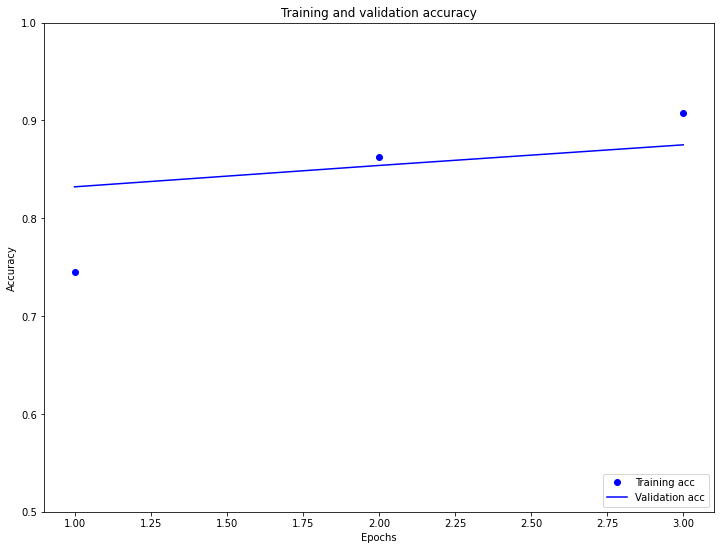

<Figure size 432x288 with 0 Axes>

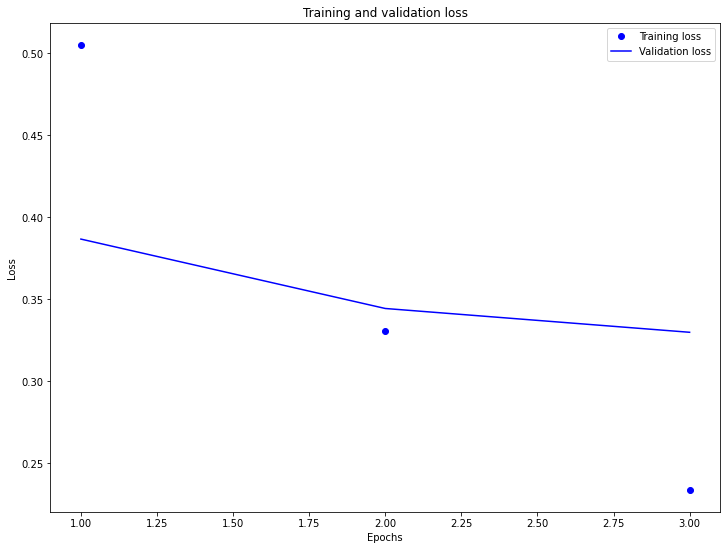

In [ ]:
import matplotlib.pyplot as plt

# history.history contains the training record

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

# clear previous figure

plt.clf()

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make Predictions from Fabricated Reviews

Let's make predictions from reviews that we fabricate. Begin by creating a function that returns the predictions. Since we create our own reviews, the function must convert the text review for TensorFlow consumption.

In [ ]:
def predict_review(text):
  encoded_text = encoder.encode(text)
  encoded_text = tf.cast(encoded_text, tf.float32)
  prediction = model.predict(tf.expand_dims(encoded_text, 0))
  return prediction

The function accepts a text review. It begins by encoding the review. Next, it converts the encoded review to float32. The function then makes the prediction. But, we have to add the '1' dimension to the encoded text so it can be consumed by the model.

Let's test the function.

In [ ]:
review = ('Just loved it. My kids thought the movie was cool. '
         'Even my wife liked it.')

pred = predict_review(review)
pred, pred.shape

(array([[0.9891733]], dtype=float32), (1, 1))

We have a prediction. Predictions greater than 0.5 mean that the review is positive. Otherwise, the review is negative. Let's make the prediction more palatable by creating another function.

In [ ]:
def palatable(pred):
  score = tf.squeeze(pred, 0).numpy()
  return score[0]

score = palatable(pred)
score, score.shape

(0.9891733, ())

The function removes the '1' dimension from the prediction. Notice that the new shape is that of a scalar.

Let's go function crazy by creating one that returns whether the review is positive or negative.

In [ ]:
def impression(score):
  if score >= 0.5:
    return 'positive impression'
  else:
    return 'negative impression'

Let's see if the function works.

In [ ]:
impression(score)

'positive impression'

As expected, the review is positive. Let's try again with another review.

In [ ]:
review = ('The movie absolutely sucked. No character development. '
         'Dialogue just blows.')

pred = predict_review(review)
score = palatable(pred)
print (impression(score))

negative impression


# Make Predictions on a Test Data Batch

We can also predict from the test set. Let's make predictions on the first test batch with the 'predict' method. Since test data is already in tensor form, we don't need to encode.

In [ ]:
# get predictions from 1st test batch

for sample, target in test_ds.take(1):
  y_pred_64 = model.predict(sample)

# display first review from this batch
print ('review:', end=' ')
print (encoder.decode(sample[0])[177:307])

# display first label from this batch
print ('label:', end=' ')
print (target[0].numpy(), br)

# display number of examples in the batch
print ('samples and target in first batch:', end=' ')
len(sample), len(target)

review: absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies.
label: 1 

samples and target in first batch: 

(64, 64)

Variable **y_pred_64** holds 64 predictions because we take the first batch of 64 from the TensorFlow consumable **test_ds**. We then display the first review and its associated label from this batch. Remember that label '1' means the review was positive and label '0' means it was negative. So, the first movie had a positive review. We end by displaying the size of the sample and target to verify that we have 64 examples in our first batch.

# First Prediction

Let's look at the first prediction.

In [ ]:
print (y_pred_64[0])

[0.97662985]


Let's make it palatable.

In [ ]:
impression(y_pred_64[0])

'positive impression'

So, the actual label from the first test batch example is positive and our predition is positive. So, our prediction was correct.

# Prediction Accuracy for the First Batch

Let's see how well we did with predictions for the entire first batch. First, traverse the first batch and compare labels to predictions. If a prediction is correct, add this information to a list. Second, count the number of correct predictions and divide by the batch size to get prediction accuracy.

In [ ]:
def convert_label(feeling):
  if feeling == 'positive impression':
    return 1
  else: return 0

ls = []
n = len(target)
for i, _ in enumerate(range(n)):
  t = target[i].numpy() # labels
  p = convert_label(impression(y_pred_64[i])) # predictions
  if t == p: ls.append(True)
correct = ls.count(True)
acc = correct / n
batch_accuracy = str(int(np.round(acc, 2) * 100)) + '%'
print ('accuracy for the first batch:', batch_accuracy)

accuracy for the first batch: 84%


# Leverage Pretrained Embeddings

Amazingly, we can reuse modules from pretrained models on the IMDb dataset. The TensorFlow Hub project is a library with hundreds of reusable machine learning modules. A **module** is a self-contained piece of a TensorFlow graph, along with its weights and assets, that can be reused across different tasks in a process known as transfer learning. **Transfer learning** is a machine learning method where a model developed for a task is reused as the starting point for a model on a different task.

You can browse the library by perusing the following URL:

http://tfhub.dev

Once you locate a module, copy the URL into your model. The module is automatically dowloaded along with its pretrained weights. A huge advantage of using pretrained models is that we don't have to create and train our own models from scratch!  

# Load IMDb Data

Since we are using a pretrained model, we can load the entire IMDb data.

In [ ]:
data, info = tfds.load('imdb_reviews', as_supervised=True,
                       with_info=True, shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0V38Y/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0V38Y/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0V38Y/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


# Prepare the Input Pipeline

In [ ]:
# create train and test sets

train, test = data['train'], data['test']

In [ ]:
# finalize the input pipeline

batch_size = 32
train_set = train.repeat().batch(batch_size).prefetch(1)
test_set = test.batch(batch_size).prefetch(1)

# Create the Pretrained Model

Import the TF Hub library and create a skeleton model to house the pretrained module.

In [ ]:
import tensorflow_hub as hub

model = keras.Sequential([
  hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1',
                 dtype=tf.string, input_shape=[], output_shape=[50]),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

The **hub.KerasLayer** downloads the sentence encoder module. Each string input into this layer is automatically encoded as a 50D vector. So, each vector represents 50 words. Each word is embedded based on an embedding matrix pretrained on the 7 billion word Google News corpus. The next two dense layers are added to provide a basic model for sentiment analysis. Using TF Hub is convenient and efficient because we can use what was already learned from the pretrained model.

# Compile

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train

In [ ]:
history = model.fit(train_set, steps_per_epoch=train_size // batch_size, epochs=5,
                    validation_data=test_set)

Epoch 1/5
781/781 [==============================] - 13s 17ms/step - loss: 0.5436 - accuracy: 0.7284 - val_loss: 0.5269 - val_accuracy: 0.7361
Epoch 2/5
781/781 [==============================] - 12s 16ms/step - loss: 0.5139 - accuracy: 0.7474 - val_loss: 0.5189 - val_accuracy: 0.7422
Epoch 3/5
781/781 [==============================] - 12s 15ms/step - loss: 0.5092 - accuracy: 0.7505 - val_loss: 0.5154 - val_accuracy: 0.7448
Epoch 4/5
781/781 [==============================] - 13s 16ms/step - loss: 0.5054 - accuracy: 0.7520 - val_loss: 0.5131 - val_accuracy: 0.7470
Epoch 5/5
781/781 [==============================] - 12s 16ms/step - loss: 0.5023 - accuracy: 0.7554 - val_loss: 0.5117 - val_accuracy: 0.7483


# Predict

Let's make predictions on the first batch, Since our batch size is 32, we have 32 predictions.

In [ ]:
for sample, target in test_set.take(1):
  y_pred_32 = model.predict(sample)

# Our First Prediction

In [ ]:
impression(y_pred_32[0])

'positive impression'

# Actual Label

In [ ]:
target[0].numpy()

1

# Prediction Accurary for First Batch

Just like we did with our model, let's get the accuracy for the first batch of 32.

In [ ]:
ls = []
n = len(target)
for i, _ in enumerate(range(n)):
  t = target[i].numpy() # labels
  p = convert_label(impression(y_pred_32[i])) # predictions
  if t == p: ls.append(True)
correct = ls.count(True)
acc = correct / n
batch_accuracy = str(int(np.round(acc, 2) * 100)) + '%'
print ('accuracy for the first batch:', batch_accuracy)

accuracy for the first batch: 75%
